Tabular SHAP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url="winequality-red.csv"
df=pd.read_csv(url,sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
x=df.drop("quality",axis=1)
y=df['quality']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
import shap

# Use an appropriate masker (for tabular data, Independent is usually fine)
masker = shap.maskers.Independent(X_train)

# Initialize the explainer using the masker
explainer = shap.Explainer(model, masker)

# Get SHAP values
shap_values = explainer(X_test)

In [25]:
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

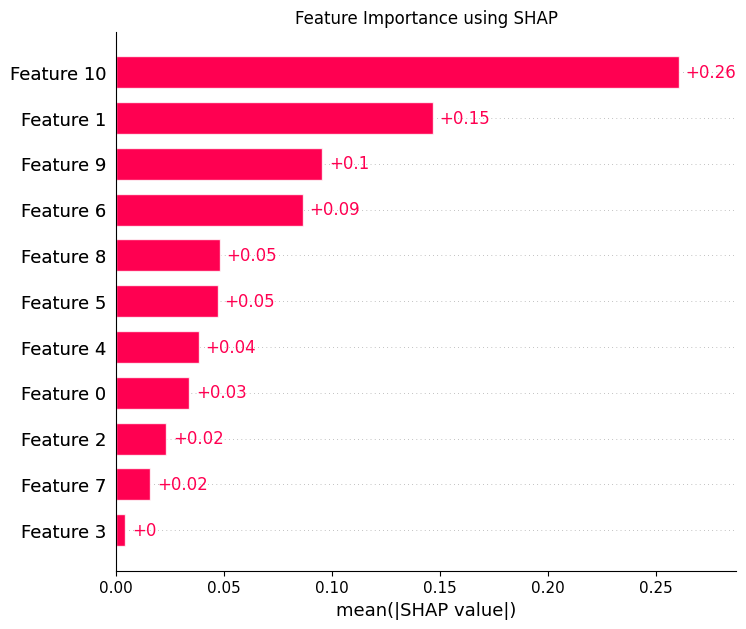

In [27]:
import matplotlib.pyplot as plt
plt.title('Feature Importance using SHAP')
shap.plots.bar(shap_values,max_display=12)

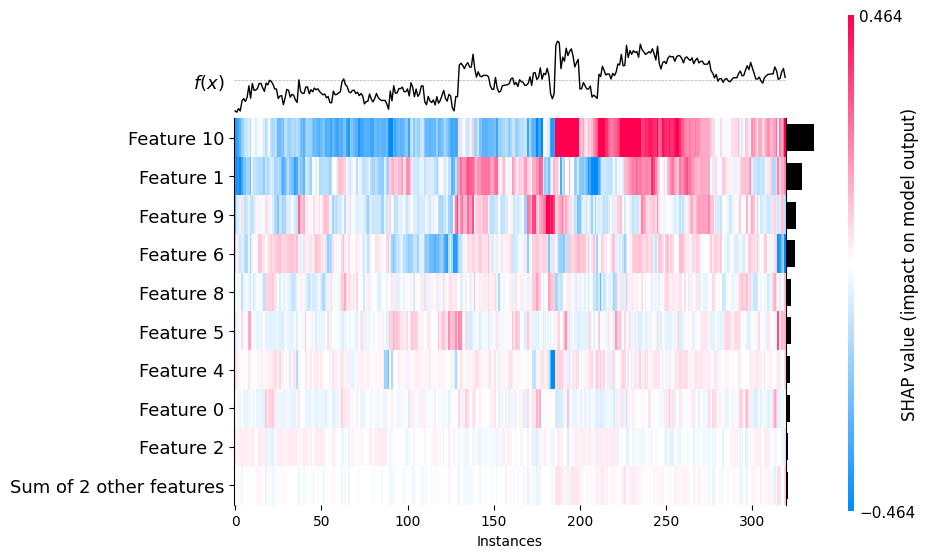

<Axes: xlabel='Instances'>

In [29]:
shap.plots.heatmap(shap_values)

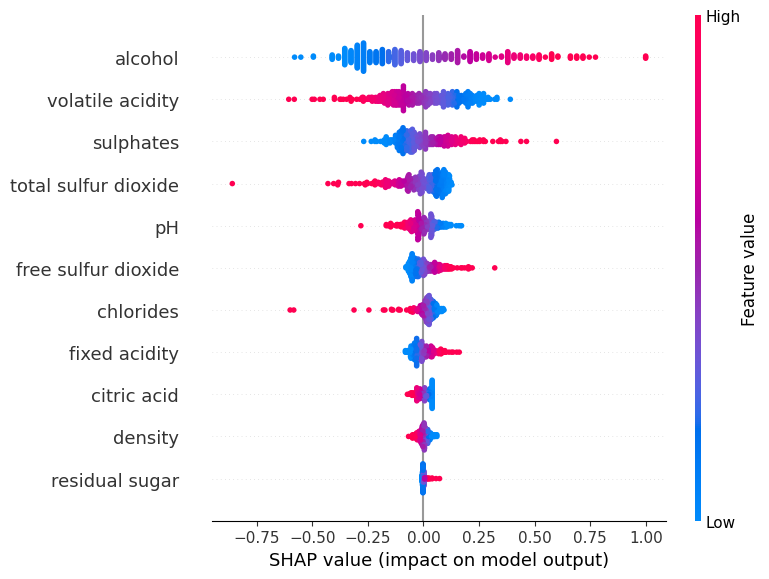

In [31]:
shap.summary_plot(shap_values,X_test,feature_names=x.columns)

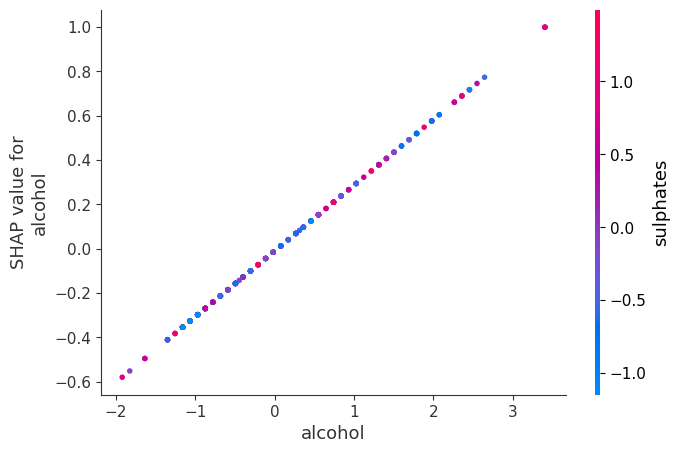

In [39]:
shap.dependence_plot('alcohol',shap_values.values,X_test,feature_names=x.columns)

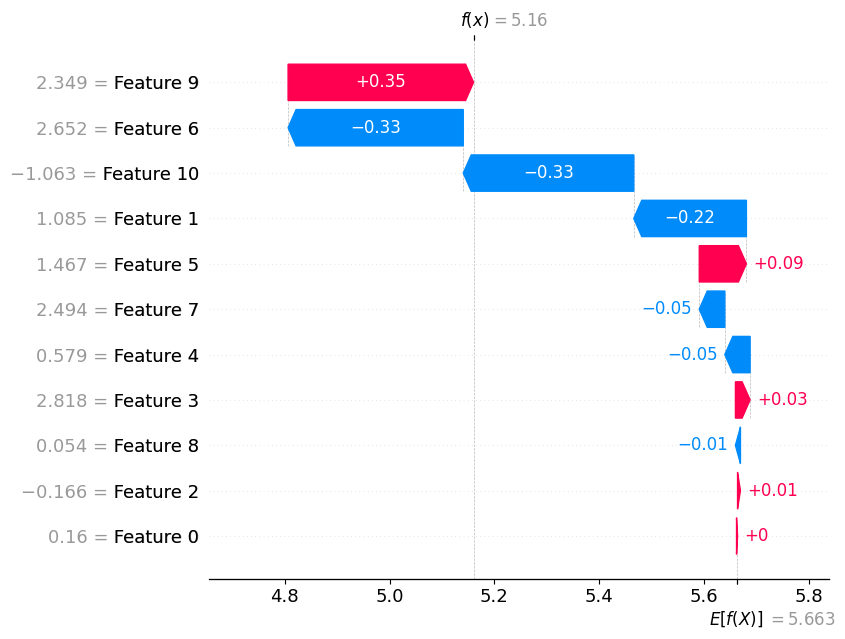

In [35]:
shap.plots.waterfall(shap_values[50], max_display = 12)

In [43]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values.values[0],
    features=X_test[0],
    feature_names=x.columns
)


Kernel Shap

In [73]:
df=pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
feature_names=df.columns
X=df.drop('Species',axis=1)
y=df['Species']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

C:\Users\maddu\AppData\Local\Temp\ipykernel_24748\1175003568.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=feature_names)


<Figure size 640x480 with 0 Axes>

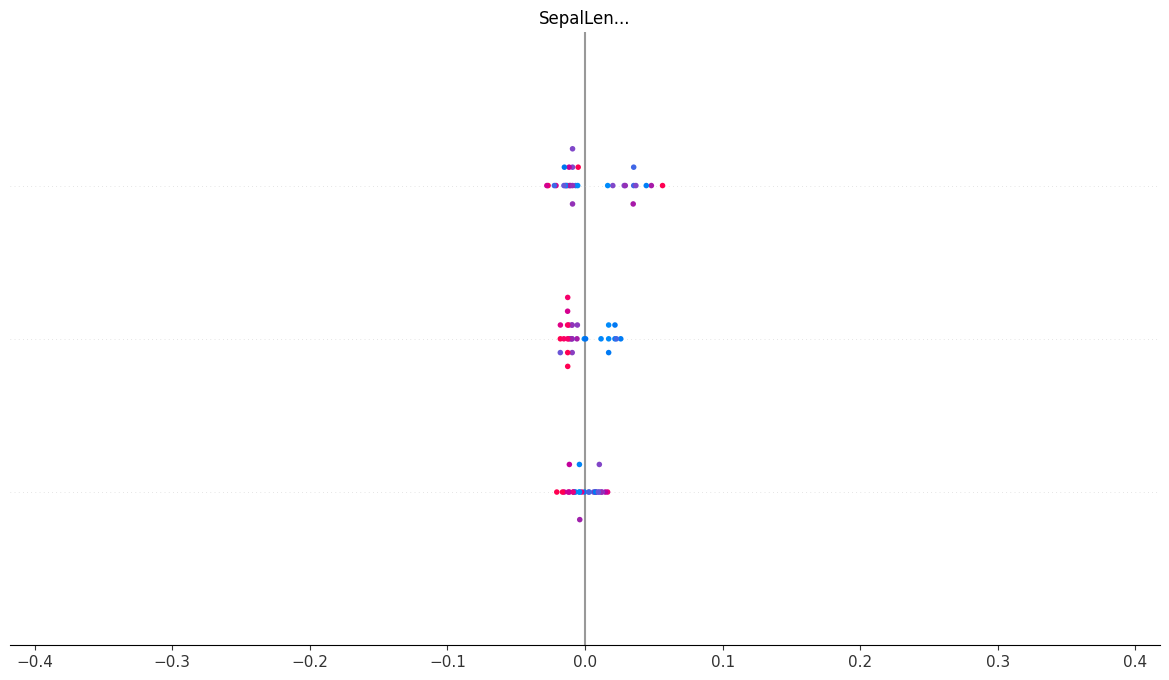

In [95]:
import shap

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="shap")

# Option 2: KMeans summary
# background = shap.kmeans(X_train, 50)

explainer = shap.KernelExplainer(model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


Image Data

In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
dataset_path=r"M:\train"
IMG_SIZE=(224,224)
BATCH_SIZE=32
SEED=42

In [65]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="training",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=True)

full_valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="validation",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=True)

train_size=len(train_ds)
val_size=len(full_valid_ds)//2
test_size=len(full_valid_ds)-val_size

valid_ds=full_valid_ds.take(val_size)
test_ds=full_valid_ds.skip(val_size)

Found 5261 files belonging to 2 classes.
Using 3683 files for training.
Found 5261 files belonging to 2 classes.
Using 1578 files for validation.


In [67]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [69]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block (Increase filters)
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block (Increase filters further)
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    # Fourth Convolutional Block (More filters)
    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    Flatten(),
    Dense(512, activation="relu"),  # Increased neurons for better learning capacity
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")  # Final output for binary classification
])

model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])
model.summary()
    

C:\Users\maddu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,329,089 (73.73 MB)

 Trainable params: 19,329,089 (73.73 MB)

 Non-trainable params: 0 (0.00 B)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.292183777783066e-05..3.775411823880859e-05].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.912305535573978e-05..5.013445479562506e-05].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.495164855848998e-05..7.266185275511816e-05].


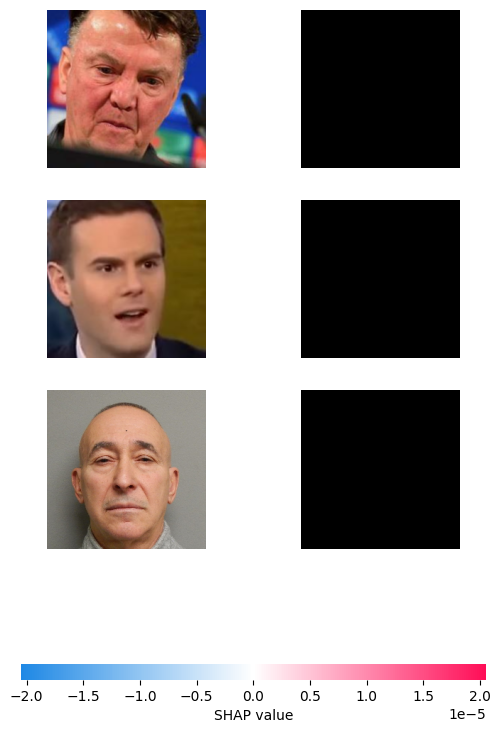

In [71]:
import numpy as np
import shap
for images,labels in train_ds.take(1):
    background = images[:10]  # background data for SHAP
    test_images = images[10:13]
    break

background_np = background.numpy().astype(np.float32) / 255.0

test_images_np = test_images.numpy().astype(np.float32) / 255.0

explainer=shap.GradientExplainer(model, background_np)

shap_values=explainer.shap_values(test_images_np)

shap.image_plot(shap_values, test_images_np)
